In [1]:
from src.ocsvm.OneClassSVMClassifier import OneClassSVMClassifier
from src.ocsvm.OneClassSVMClassifier import OneClassSVMModel 
import numpy as np
import matplotlib.pyplot as plt
import torch

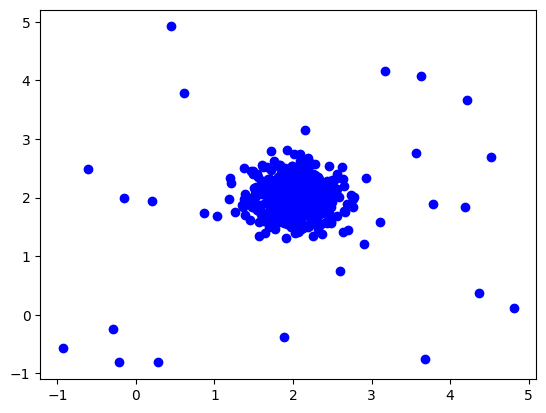

In [20]:
def make_blob_dataset(n_samples, contamination=0.05, random_state=42):
    rng = np.random.RandomState(random_state)
    X_inliers = 0.3 * rng.normal(size=(int(n_samples * (1. - contamination)), 2)) + 2
    X_outliers = rng.uniform(low=-1, high=5, size=(int(n_samples * contamination), 2))
    X = np.concatenate((X_inliers, X_outliers), axis=0)
    rng.shuffle(X)
    return X

X = make_blob_dataset(500)
plt.scatter(X[:, 0], X[:, 1], color='b');

In [21]:
ocsvm = OneClassSVMModel(nu=0.1, gamma=0.3)


In [22]:
decision, y_pred = ocsvm.fit(X)

In [23]:
decision

array([ 2.61754018e-02,  7.66308758e-03, -8.89232639e-03,  2.94009003e-02,
        7.94768800e-03,  3.83000753e-02,  4.02913796e-03,  3.49452439e-02,
        4.61929230e-02,  3.99488603e-02,  1.12218938e-02,  2.29438835e-02,
       -1.35851435e-02,  3.54457457e-02,  2.76403985e-02,  3.42031305e-02,
        4.26730950e-02,  1.61341073e-02,  3.75857843e-02,  3.94318619e-02,
        4.65571270e-02,  3.63753810e-02,  7.22129424e-03,  4.23503837e-02,
        3.43426723e-02,  3.57323286e-02,  4.59020807e-02,  3.74430358e-02,
        4.37357081e-02,  4.14414972e-02,  3.92350928e-02,  4.43643943e-02,
        3.06566879e-02,  4.53808917e-02,  4.39290649e-02,  4.15358721e-02,
        2.18444984e-02,  3.74995514e-02, -1.55550367e-02, -1.23619812e-08,
        6.93054283e-03,  3.72529058e-02,  4.44700412e-02,  3.63195397e-02,
        3.21923595e-02,  2.85478342e-02,  1.08626439e-03,  2.54661515e-02,
        2.87932922e-02,  4.47540412e-02,  3.77043315e-02,  1.34527193e-02,
        4.51031281e-02,  

In [24]:
x_data = torch.tensor(X)

In [25]:
classifier = OneClassSVMClassifier(x_data, nu=0.5, gamma=0.8, num_inducing_points=100)

In [26]:
classifier.fit()

(array([ 3.26812656e-02,  4.16996727e-02, -2.60833866e-01, -2.82605037e-01,
        -2.61705164e-01, -3.24451878e-02, -1.21324663e-02, -1.26111940e-02,
        -2.98276628e-01, -5.64526837e-03, -2.36585940e-01,  2.50826138e-02,
        -6.29055718e-02, -1.11022302e-16, -1.80605372e-01,  2.97390761e-02,
        -2.84077568e-01, -1.23019902e-02, -2.93401073e-01, -2.62342611e-01,
         2.29033946e-02, -1.52983772e-02, -2.68577322e-01,  4.09912882e-02,
        -4.35211322e-02,  3.45334329e-02,  2.13351794e-02, -1.84141490e-01,
         2.69800732e-02,  3.47887538e-02, -2.57088202e-01, -1.30879629e-09,
        -1.55660076e-01, -2.74113020e-01, -2.72958178e-01, -2.63380185e-01,
         2.48809223e-03, -9.36889574e-02,  3.51064122e-02,  3.90712035e-02,
         1.89493235e-02,  4.08349198e-02, -2.70457421e-01,  3.85179049e-02,
         1.96379814e-02,  8.43874580e-03, -1.82624316e-03, -1.15185794e-01,
        -9.02729743e-02, -2.69192339e-01,  1.30685198e-02, -2.27377082e-01,
        -2.5

In [27]:
decision, y_pred = classifier.decision()

In [28]:
decision

array([ 3.26812656e-02,  4.16996727e-02, -2.60833866e-01, -2.82605037e-01,
       -2.61705164e-01, -3.24451878e-02, -1.21324663e-02, -1.26111940e-02,
       -2.98276628e-01, -5.64526837e-03, -2.36585940e-01,  2.50826138e-02,
       -6.29055718e-02, -1.11022302e-16, -1.80605372e-01,  2.97390761e-02,
       -2.84077568e-01, -1.23019902e-02, -2.93401073e-01, -2.62342611e-01,
        2.29033946e-02, -1.52983772e-02, -2.68577322e-01,  4.09912882e-02,
       -4.35211322e-02,  3.45334329e-02,  2.13351794e-02, -1.84141490e-01,
        2.69800732e-02,  3.47887538e-02, -2.57088202e-01, -1.30879629e-09,
       -1.55660076e-01, -2.74113020e-01, -2.72958178e-01, -2.63380185e-01,
        2.48809223e-03, -9.36889574e-02,  3.51064122e-02,  3.90712035e-02,
        1.89493235e-02,  4.08349198e-02, -2.70457421e-01,  3.85179049e-02,
        1.96379814e-02,  8.43874580e-03, -1.82624316e-03, -1.15185794e-01,
       -9.02729743e-02, -2.69192339e-01,  1.30685198e-02, -2.27377082e-01,
       -2.59538178e-01,  

In [29]:
y_pred

array([ 1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.,
       -1., -1.,  1., -1., -1., -1., -1.,  1., -1., -1.,  1., -1.,  1.,
        1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1.,
        1.,  1.,  1., -1.,  1.,  1.,  1., -1., -1., -1., -1.,  1., -1.,
       -1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1.,
       -1., -1., -1., -1., -1., -1.,  1.,  1.,  1., -1.,  1., -1.,  1.,
        1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,
        1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.])

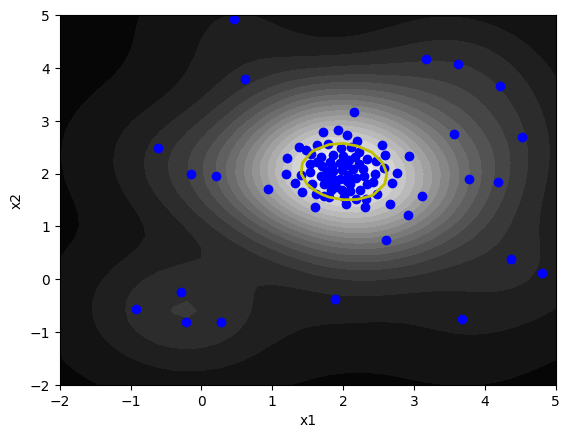

In [30]:
classifier.plot()

In [31]:
# create object of ocsvmshap
from src.explanation_algorithms.OCSVMSHAP import OCSVMSHAP

In [32]:
ocsvm_shap = OCSVMSHAP(X=x_data, classifier=classifier)

In [33]:
x_data.shape
2**x_data.shape[1]

4

In [34]:
ocsvm_shap.fit_ocsvmshap(X=x_data, num_coalitions=2**x_data.shape[1])

/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: divide by zero encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: invalid value encountered in cast
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: invalid value encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
100%|██████████| 3/3 [00:00<00:00, 2050.34it/s]


In [35]:
from src.utils.visualisation.deterministic_values import summary_plot
mean_stochastic_shapley_values = ocsvm_shap.return_deterministic_shapley_values()

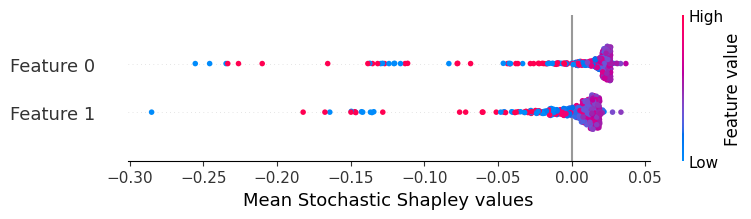

In [36]:
summary_plot(mean_stochastic_shapley_values, x_data)
plt.xlabel("Mean Stochastic Shapley values")
plt.show()

In [37]:
from src.utils.visualisation.deterministic_values import bar_plot
bar_plot(mean_stochastic_shapley_values, x_data)
plt.xlabel("Mean Stochastic Shapley values")
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## Dataset 2

In [38]:
import numpy as np
import pandas as pd
import torch
from sklearn.datasets import make_blobs


In [39]:
# blob with a line 
def make_new_blob_dataset(n_samples, contamination=0.02, random_state=42):
    rng = np.random.RandomState(random_state)
    X_inliers = 0.3 * rng.normal(size=(int(n_samples * (1. - contamination)), 2)) + 2
    
    # Generate outliers in one direction for the first feature
    X_outliers = np.column_stack((
        rng.uniform(low=4, high=5, size=(20,)),  
        rng.uniform(low=-1, high=5, size=(20,)) 
    ))
    
    # Combine the datasets
    X = np.concatenate((X_inliers, X_outliers), axis=0)
    rng.shuffle(X)
    
    return X

The intention is to say that the straight line on the right are all outliers adn they are outliers becaue their x value is more than the regular inliners

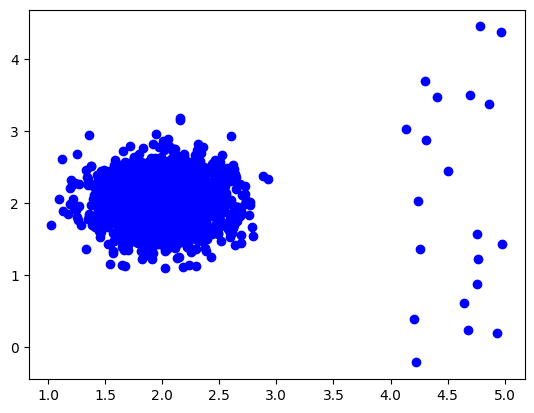

In [40]:
X = make_new_blob_dataset(2000, contamination=0.1)
plt.scatter(X[:, 0], X[:, 1], color='b');

In [41]:
ocsvm = OneClassSVMModel(nu=0.1, gamma=0.3)
decision, y_pred = ocsvm.fit(X)
x_data = torch.tensor(X)

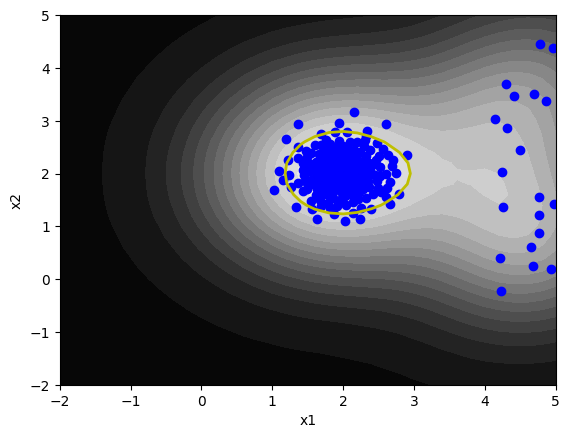

In [42]:
classifier = OneClassSVMClassifier(x_data, nu=0.2, gamma=0.5, num_inducing_points=200)
classifier.fit()
decision, y_pred = classifier.decision()
classifier.plot()

In [43]:
from src.explanation_algorithms.OCSVMSHAP import OCSVMSHAP
ocsvm_shap = OCSVMSHAP(X=x_data, classifier=classifier)
ocsvm_shap.fit_ocsvmshap(X=x_data, num_coalitions=2**x_data.shape[1])

/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: divide by zero encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: invalid value encountered in cast
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: invalid value encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
100%|██████████| 3/3 [00:00<00:00, 2399.95it/s]


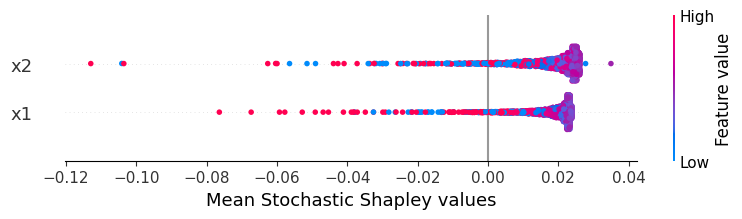

In [44]:
from src.utils.visualisation.deterministic_values import summary_plot
mean_stochastic_shapley_values = ocsvm_shap.return_deterministic_shapley_values()
summary_plot(mean_stochastic_shapley_values, x_data, feature_names=['x1', 'x2'])
plt.xlabel("Mean Stochastic Shapley values")
plt.show()

In [45]:
mean_stochastic_shapley_values.shape

torch.Size([2, 1820])

## Datatset3 

In [46]:
from sklearn.datasets import load_wine
data = load_wine()
X = data.data

In [47]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

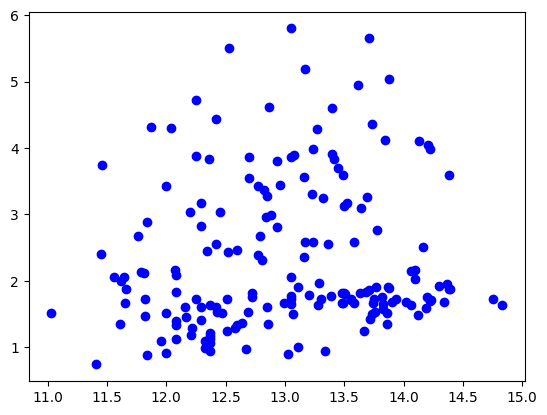

In [48]:
plt.scatter(X[:, 0], X[:, 1], color='b');